In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


# EDA

In [2]:
## Importaremos el conjunto de datos para comenzar a trabajar con él:

url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
total_data = pd.read_csv(url, sep=",")
total_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [9]:
## Eliminar información irrelevante

total_data = total_data.drop('package_name', axis=1)
total_data.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [10]:
polarity_counts = total_data["polarity"].value_counts()
print(polarity_counts)

polarity
0    584
1    307
Name: count, dtype: int64


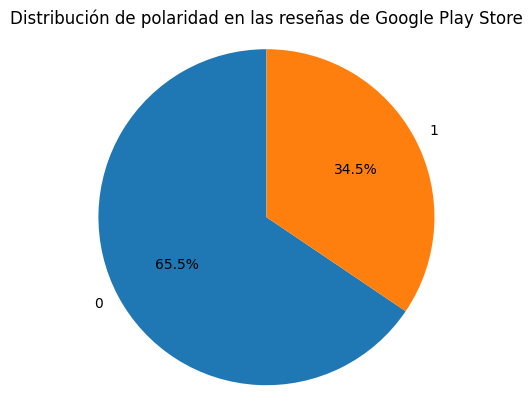

In [13]:
## Grafico

plt.pie(polarity_counts, labels=polarity_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de polaridad en las reseñas de Google Play Store")
plt.axis("equal")  # Para que el gráfico sea circular
plt.show()

In [14]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.3/551.3 kB 3.4 MB/s  0:00:00

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


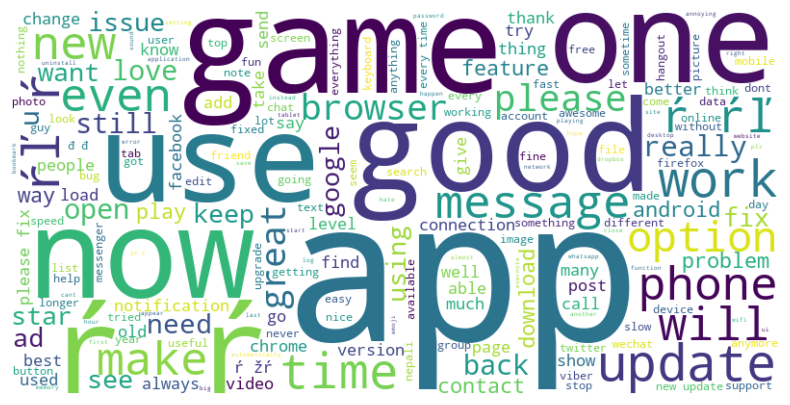

In [16]:
from wordcloud import WordCloud

txt = " ".join(str(review) for review in total_data["review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(txt)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
## Eliminar espacios y convertir a minúsculas el texto:

total_data["review"] = total_data["review"].str.strip().str.lower()
total_data.head()

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [20]:
## Modelado
from sklearn.model_selection import train_test_split

X = total_data["review"]
y = total_data["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   


